# Graph of actors

In [1]:
import networkx as nx
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load preprocessed data

In [2]:
df_movies = pd.read_pickle('../data/generated/preprocessed/movies.pkl')

In [3]:
df_movies

,wiki_id,fb_id,movie_name,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,Thriller,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,Thriller,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,English Language,United States of America,Thriller,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United States of America,Thriller,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,English Language,United States of America,Thriller,1983
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Thriller,2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,United States of America,Thriller,2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,Thriller,1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,English Language,United States of America,Thriller,1992


In [4]:
df_actors = pd.read_pickle('../data/generated/preprocessed/characters.pkl')

In [5]:
df_actors

,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/03wcfv7,United States of America
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0346l4,Canada
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/01vw26l,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/034hyc,United Kingdom
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/01y9xg,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0b_vcv,NaN
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0bx7_j,NaN
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,English people,David Hemmings,15.0,/m/0g8ngmc,/m/022g44,England
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,/m/0g8ngmm,NaN


## Create a graph of actors by movie

Each actor is a node, each edge exists if two actors have played in the same movie

### Exploration

#### Test if we have info for all movies

In [6]:
# load list of actors, identified by their freebase_id
nodes = list(df_actors.fb_actor_id.unique())
print(f'{nodes[:4]=}\n{len(nodes)=}')

nodes[:4]=['/m/03wcfv7', '/m/0346l4', '/m/01vw26l', '/m/034hyc']
len(nodes)=135761


In [7]:
# load list of movies for which we have actors
# NOTE : there are less movies in the actors dataframe than in the movies dataframee
movie_fbids = list(df_actors.fb_movie_id.unique())
print(f'{movie_fbids[:4]=}\n{len(movie_fbids)=}\n{len(df_movies)=}')

movie_fbids[:4]=['/m/03vyhn', '/m/08yl5d', '/m/0crgdbh', '/m/01mrr1']
len(movie_fbids)=64330
len(df_movies)=81741


In [8]:
# Do we have a movie entry for every movie in the actors dataset ? -> YES
len(set(movie_fbids) & set(df_movies.fb_id.unique())) == len(movie_fbids)

True

#### Distribution of number of actors per movie

In [9]:
# NOTE : for some movies, we are missing the freebase_actor_id
df_actors[df_actors.fb_actor_id.isna()]

,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality
1104,24053482,/m/07kg7s3,1997,Booking Officer,NaN,NaN,NaN,NaN,NaN,NaN,/m/07vrjlb,NaN,NaN
1107,24053482,/m/07kg7s3,1997,Tony Morrell,NaN,NaN,NaN,NaN,NaN,NaN,/m/07vrjmd,NaN,NaN
1111,24053482,/m/07kg7s3,1997,Officer Derrick,NaN,NaN,NaN,NaN,NaN,NaN,/m/07vrjnv,NaN,NaN
1116,24053482,/m/07kg7s3,1997,Scott Douglas,NaN,NaN,NaN,NaN,NaN,NaN,/m/07vrjrt,NaN,NaN
1118,24053482,/m/07kg7s3,1997,Officer Tim,NaN,NaN,NaN,NaN,NaN,NaN,/m/07vrjsq,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448590,7533970,/m/0kv9xq,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0csglc1,NaN,NaN
448591,7533970,/m/0kv9xq,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0cstkhk,NaN,NaN
448592,7533970,/m/0kv9xq,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0cspyps,NaN,NaN
448593,7533970,/m/0kv9xq,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0gc1k8_,NaN,NaN


In [10]:
# Count the number of actors per movie
df_numactors_per_movie = (df_actors
	.groupby('fb_movie_id')
	[['fb_movie_id']]
	.apply('count')
	.rename(columns={'fb_movie_id': 'numactors_per_movie'})
)
df_numactors_per_movie

,numactors_per_movie
fb_movie_id,
/m/011_mj,9
/m/011_p6,5
/m/011_zy,4
/m/011wtv,18
/m/011x_4,20
...,...
/m/0yyn5,16
/m/0yyts,10
/m/0yzbg,13


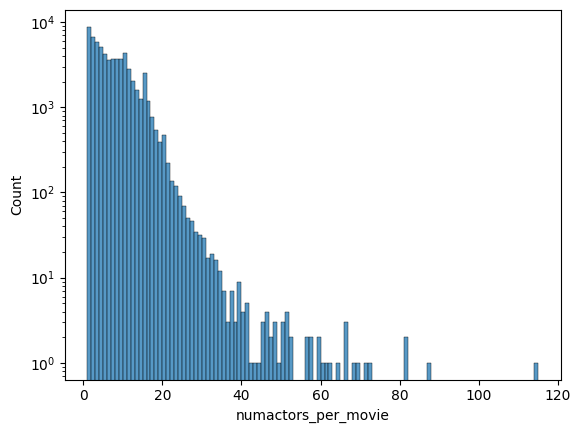

In [11]:
sns.histplot(df_numactors_per_movie, x='numactors_per_movie', binwidth=1, log_scale=(False, True));

-> It's an exponential law !!

#### Order of magnitude for the edges

Number of edges will grow as ``O(num_actors**2 * num_movies)`` -> huge !!

How much approximatively ?

In [12]:
print(f'{df_numactors_per_movie.mean()=}\n{df_numactors_per_movie.median()=}')

df_numactors_per_movie.mean()=numactors_per_movie    7.005581
dtype: float64
df_numactors_per_movie.median()=numactors_per_movie    6.0
dtype: float64


In [13]:
print(f'num_edges ~ {(float(df_numactors_per_movie.mean())**2 * len(df_actors.fb_movie_id.unique())):.1e}')

num_edges ~ 3.2e+06


-> looks feasible to have of order 10**6 edges, let's run the computation

In [14]:
df_actors

,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/03wcfv7,United States of America
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0346l4,Canada
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/01vw26l,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/034hyc,United Kingdom
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/01y9xg,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0b_vcv,NaN
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0bx7_j,NaN
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,English people,David Hemmings,15.0,/m/0g8ngmc,/m/022g44,England
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,/m/0g8ngmm,NaN


### Generate edges

We generate edges, and filter out actors which do not have all of the following :
- ``freebase_actor_id``
- ``actor_nationality``
- ``actor_gender``
- ``actor_birth``

In [15]:
edges = []
edges_unfiltered = []

for movie_fbid, df_movie in df_actors.dropna(subset=['fb_actor_id']).groupby('fb_movie_id'):
	# generate undirected edges and add it to the edges list
	# https://docs.python.org/3/library/itertools.html#itertools.combinations
	# So if the input elements are unique, there will be no repeated values in each combination.
	# The code for combinations() can be also expressed as a subsequence of permutations() after filtering entries where the elements are not in sorted orderE
	edges_unfiltered += [ (ij[0], ij[1], {'movie_fbid': movie_fbid})  for ij in itertools.combinations(df_movie.fb_actor_id, r=2) ]

for movie_fbid, df_movie in df_actors.dropna(subset=['fb_actor_id', 'actor_nationality', 'actor_gender', 'actor_birth']).groupby('fb_movie_id'):
	edges += [ (ij[0], ij[1], {'movie_fbid': movie_fbid})  for ij in itertools.combinations(df_movie.fb_actor_id, r=2) ]

In [16]:
print(f'num_edges filtered = {len(edges):.1e}')
print(f'num_edges unfiltered = {len(edges_unfiltered):.1e}')

num_edges filtered = 7.0e+05
num_edges unfiltered = 2.3e+06


We have of order millions of edges without filtering, and a bit less (order ``10**5``) with filtering NAs.

### Create and export the graph

In [17]:
actor_graph = nx.Graph(edges)
actor_graph_unfiltered = nx.Graph(edges_unfiltered)

In [18]:
print('{:.1%}'.format(len(set(actor_graph_unfiltered.nodes) & set(df_actors.fb_actor_id)) / len(set(df_actors.fb_actor_id))))

98.9%


after creating the graph, 98.9\% of the actors present in the actor dataset remain

this is due to the fact we have ``~10^4`` movies with only one actor, that do not create edges

In [19]:
# to load a graph
# actor_graph = nx.read_edgelist('../data/generated/graph/actor_graph_bymovie.edgelist.gz')

In [20]:
# export the graph !
# nx.write_edgelist(actor_graph, '../data/generated/graph/actor_graph_bymovie.edgelist.gz')
# nx.write_edgelist(actor_graph_unfiltered, '../data/generated/graph/actor_graph_unfiltered_bymovie.edgelist.gz')

### Some basic graph analysis

See also :
- https://networkx.org/documentation/stable/reference/algorithms/approximation.html
- https://networkx.org/documentation/stable/reference/algorithms/assortativity.html

These could be useful resources to analyse the graph

#### Number of edges

In [21]:
print(f'{actor_graph.number_of_edges()=:.1e}')

actor_graph.number_of_edges()=6.1e+05


we have a little fewer edges because networkx already removed duplicates for us (e.g. pairs of actors playing in different movies)

#### Number of nodes

In [22]:
print(f'{actor_graph.number_of_nodes()=:.1e}')

actor_graph.number_of_nodes()=3.5e+04


#### Distribution of degree (i.e how many other actors does each actor know ?)

Distribution of neighbor degrees

In [23]:
degrees = dict(nx.degree(actor_graph_unfiltered))

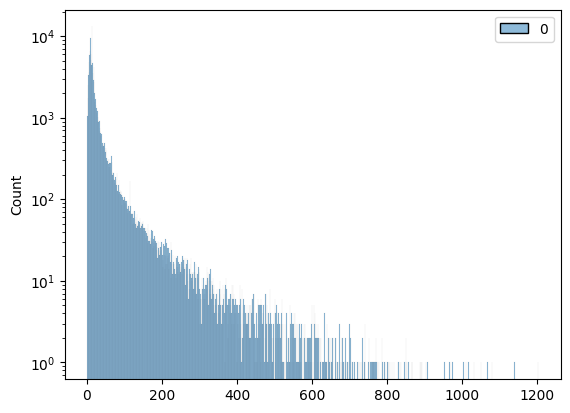

In [24]:
sns.histplot(degrees.values(), log_scale=(False, True), binwidth=1);

-> Does not look like an exponential law

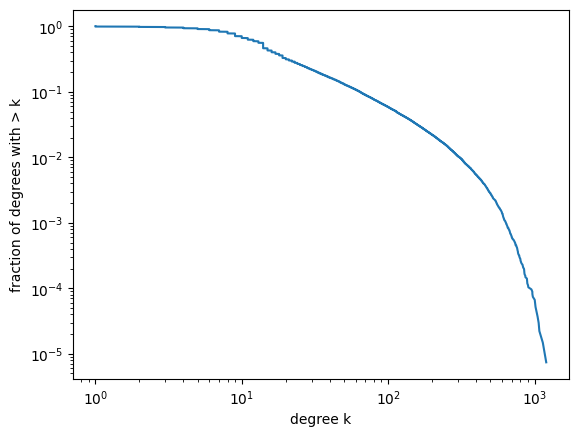

In [25]:
fig, ax = plt.subplots()
ax.plot(sorted(degrees.values()), (np.arange(1, len(degrees)+1)/len(degrees))[::-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('fraction of degrees with > k')
ax.set_xlabel('degree k');

-> 3 different regimes, might be power law between `10**1` and `5*10**3`, and another power law after `5*10**3`

-> this is weird, normally social graphs are power laws with one exponent

-> note that for unfiltered actors this 3-regime is more strongly pronounced

In [1]:
# NOTE to self : this visualization is misleading ! 
# if we plot the raw value_counts(), we see a nice power law !
# it looks like it has a kink, but that's just a binning artefact

#### Distribution of average degree connectivity

The average degree connectivity is the average nearest neighbor degree of nodes with degree k.

In [26]:
average_degree_connectivity = nx.average_degree_connectivity(actor_graph_unfiltered)

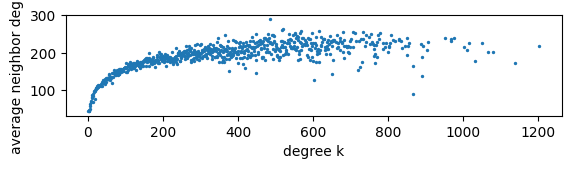

In [27]:
fig, ax = plt.subplots()
ax.scatter(average_degree_connectivity.keys(), average_degree_connectivity.values(), s=2)
ax.set_xlabel('degree k')
ax.set_ylabel('average neighbor degree')
ax.set_aspect('equal')
plt.show()

-> on average, the neighbors of actors are connected to more people than the actors themselves

(This is characteristic of social graphs !)

#### Distribution of neighbor degrees

In [28]:
average_neighbor_degree = nx.average_neighbor_degree(actor_graph_unfiltered)

<AxesSubplot: ylabel='Count'>

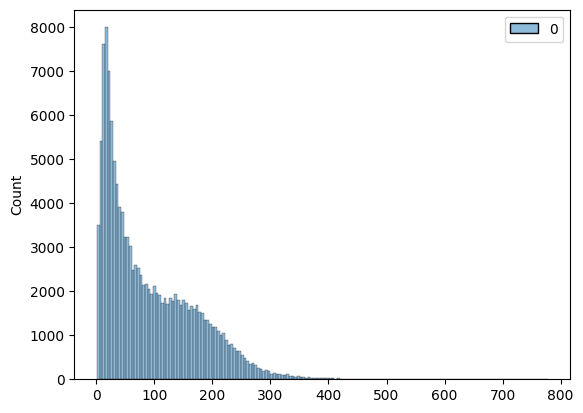

In [29]:
sns.histplot(average_neighbor_degree.values())

### Create a visualization

This is actually very difficult.

I try to use gephi : https://gephi.org/ -> also very difficult, need to reduce the size of the graph !!

In [30]:
# produces a 145MB file... yikes !
# nx.write_gexf(actor_graph, '../data/generated/graph/actor_graph_bymovie.gexf')

In [31]:
# faster to complete
# nx.write_edgelist(actor_graph, '../data/generated/graph/actor_graph_bymovie.csv', data=False)

In [32]:
# actor_graph_int = nx.convert_node_labels_to_integers(actor_graph)

In [33]:
# I tried to export to a .dot format to viz with Graphviz, but this seems to hang
# nx.nx_pydot.write_dot(actor_graph_int, '../data/generated/graph/actor_graph_bymovie.dot')

In [34]:
# And this is suuuuper slow (never finished even one iteration lol)
# pos = nx.spring_layout(actor_graph_int)